# Prediction of cancellation of hotel bookings

### Goals

The Goals is to predict if the customer is going to honor the reservation or cancel it. So the exploratory data analysis will be more focusing on booking_status

### Data loading 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df_copy = df.copy()

### EDA

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Conclusion: No missing value

In [7]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

Conclusion: Booking_ID having the exact amount of unique values as the amount of rows does not influence the cancellation predicition

In [8]:
df = df.drop('Booking_ID', axis = 1)

In [9]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

<Axes: xlabel='booking_status', ylabel='count'>

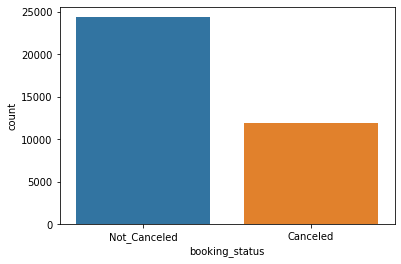

In [10]:
sns.countplot(x='booking_status', data=df)

Conclusion: There are twice as many canceled bookings as non-cancelled bookings 

# Correlation matrix

<Axes: >

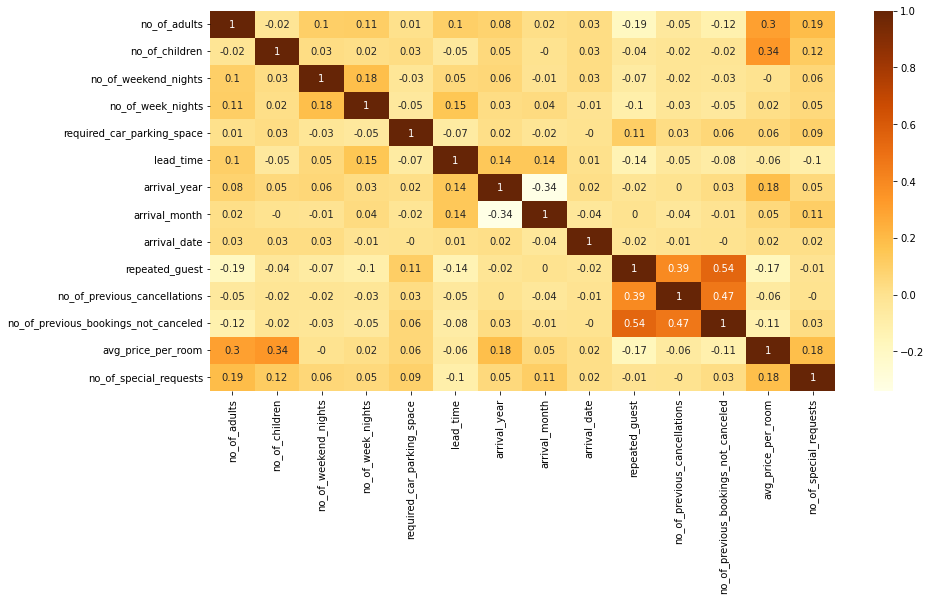

In [11]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

No strong correlation between variables - features are not collinear.

The strongest correlation is between a repeated_guest and no_of_previous_cancellations and no_of_previous_bookings_not_canceled.

There is a correlation between avg_price_per_room and the no_of_adults and no_of_children

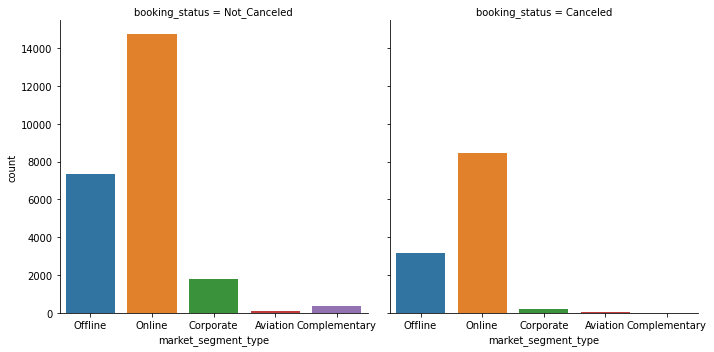

In [12]:
 sns.catplot(df, x="market_segment_type", col='booking_status', kind='count')

<Axes: xlabel='booking_status', ylabel='lead_time'>

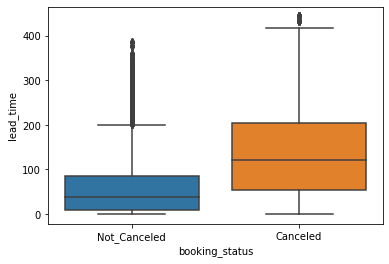

In [13]:
sns.boxplot(df, y="lead_time", x='booking_status')

<Axes: xlabel='booking_status', ylabel='no_of_week_nights'>

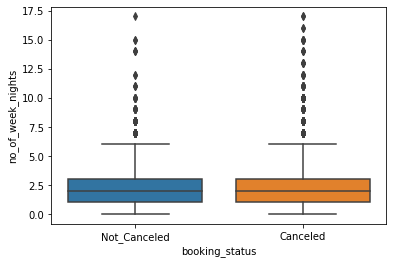

In [14]:
sns.boxplot(df, y="no_of_week_nights", x='booking_status')

Conclusion: bookings for stays during week days do not influence the amount of cancellations

<Axes: xlabel='booking_status', ylabel='no_of_weekend_nights'>

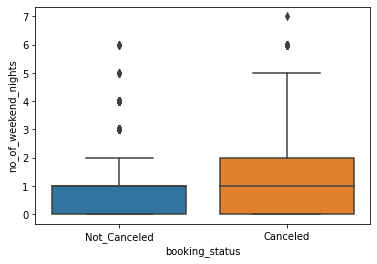

In [15]:
sns.boxplot(df, y="no_of_weekend_nights", x='booking_status')

Conclusion: bookings for stays during weekends are more often cancelled than not

<Axes: xlabel='booking_status', ylabel='count'>

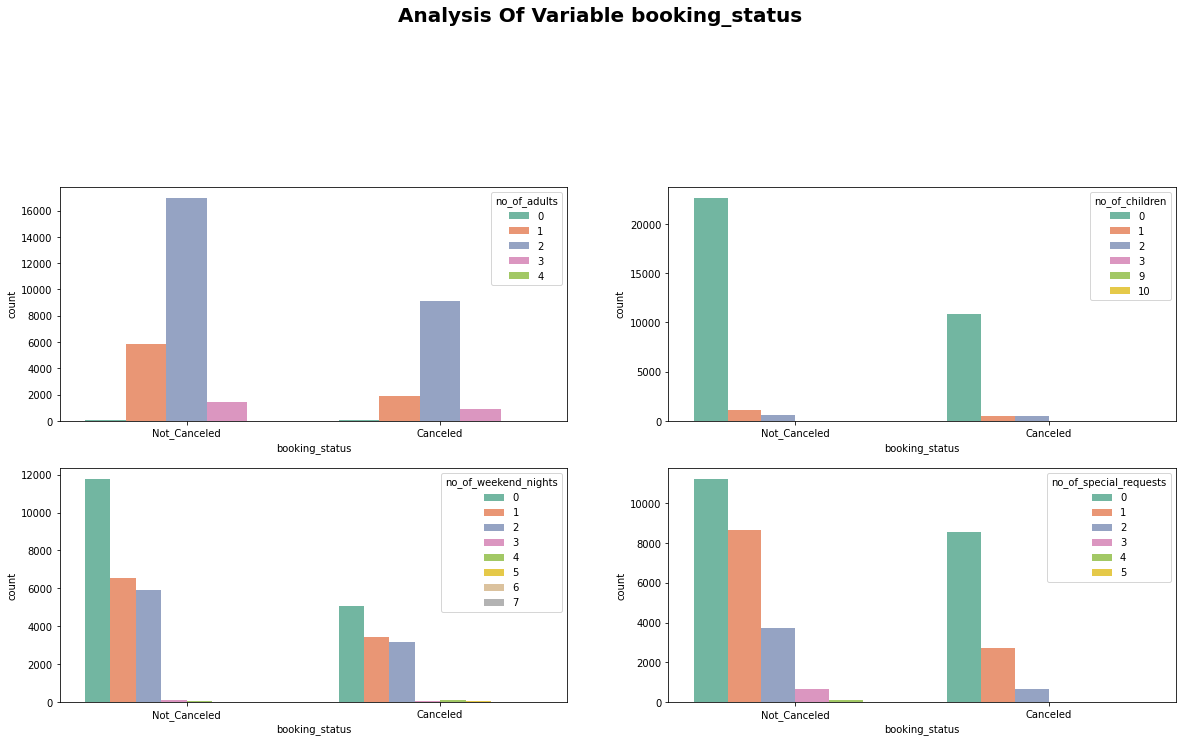

In [16]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)   

Conclusions:
Most bookings are made for two adults, without children. When the amount of children equals 2, the possibility of booking cancellation rises.

Proportion of cancelled and not-cancelled bookings for weekend stays is even.

The more special requests, the lesser probability of booking cancellation.

<Axes: xlabel='booking_status', ylabel='count'>

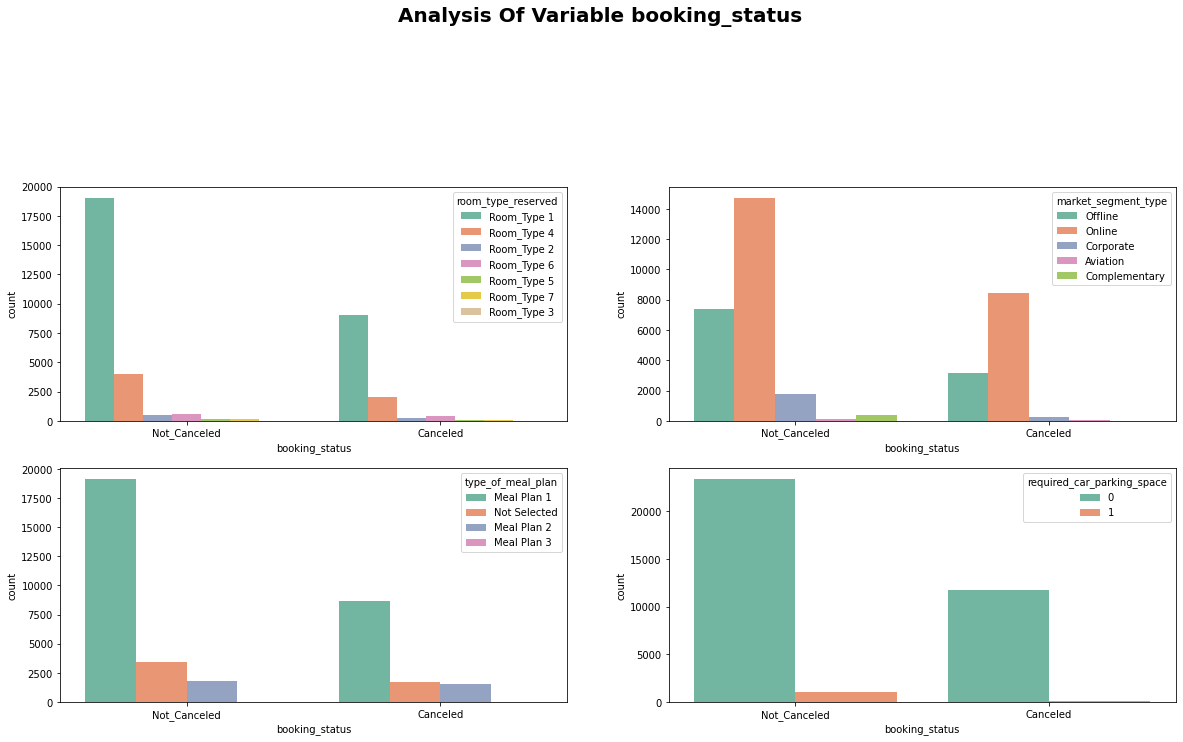

In [17]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)
              
plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

Conclusions:
The most often booked is Room_Type 1, at the same time the amount of cancellation rises for Room_Type 6.

Corporate bookings are cancelled less often. 

The amount of cancellation rises for Meal_Type 2.

Bookings without parking space are made more often.

<ipython-input-18-9e84e428aef8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)
<ipython-input-18-9e84e428aef8>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)
<ipython-input-18-9e84e428aef8>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)
<ipython-input-18-9e84e428aef8>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an 

<Axes: xlabel='lead_time', ylabel='Density'>

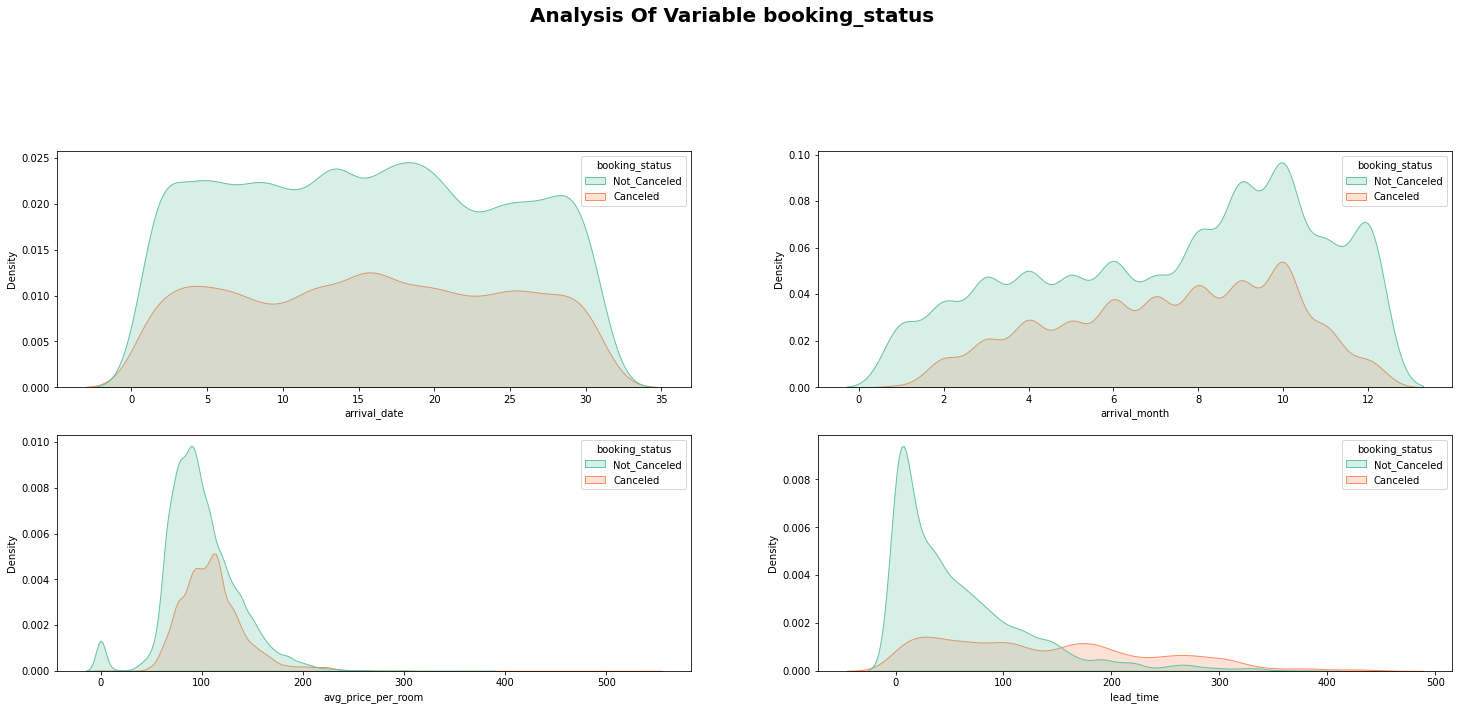

In [18]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(4,2,2)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(4,2,3)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(4,2,4)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

Conclusions:
Proportion of cancelled and not-cancelled bookings for arrival on a specific month day is even. The least cancelled bookings is for stays on 25th day of month.

Bookings are made more often for the second part of the year. The highest risk of booking cancellation is for the summer months (between June and August).

The amount of not-cancelled bookings is biggest between November and December.

The most often made bookings are for the price per room between 50 and 150 EUR.

The shorter period between booking date and arrival date, the lesser the possibility of booking cancellation. For bookings made with 150 days advance period, the possibility of booking cancellation rises.

<Axes: xlabel='booking_status', ylabel='no_of_special_requests'>

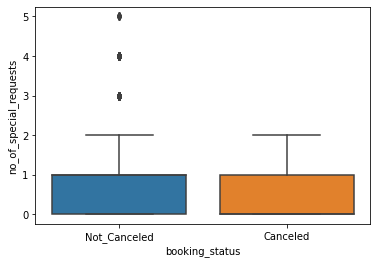

In [19]:
sns.boxplot(df, y="no_of_special_requests", x='booking_status')

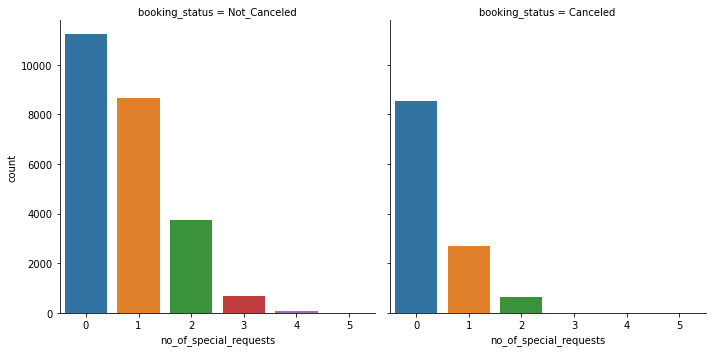

In [20]:
 sns.catplot(df, x="no_of_special_requests", col='booking_status', kind='count')

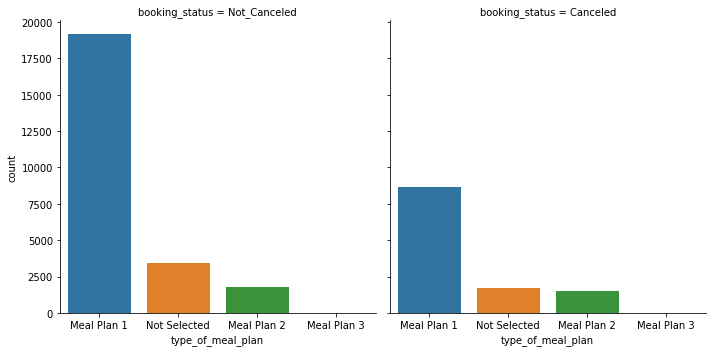

In [21]:
 sns.catplot(df, x="type_of_meal_plan", col='booking_status', kind='count')

In [22]:
df.loc[:,'arrival_year':]

,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...
36270,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [23]:
df.loc[(df['arrival_date']==29)&(df['arrival_month']==2)&(df['arrival_year']==2018),'arrival_date']=28
df['date']=df['arrival_date'].astype('str') + '-' + df['arrival_month'].astype('str') + '-' + df['arrival_year'].astype('str')

df['date']= pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')
df[['date', 'arrival_date', 'arrival_month', 'arrival_year']]

,date,arrival_date,arrival_month,arrival_year
0,2017-10-02,2,10,2017
1,2018-11-06,6,11,2018
2,2018-02-28,28,2,2018
3,2018-05-20,20,5,2018
4,2018-04-11,11,4,2018
...,...,...,...,...
36270,2018-08-03,3,8,2018
36271,2018-10-17,17,10,2018
36272,2018-07-01,1,7,2018
36273,2018-04-21,21,4,2018


In [24]:
df[['date', 'arrival_date','arrival_month', 'arrival_year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           36275 non-null  datetime64[ns]
 1   arrival_date   36275 non-null  int64         
 2   arrival_month  36275 non-null  int64         
 3   arrival_year   36275 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.1 MB


In [25]:
df.loc[df['date'].isnull(), ['date','arrival_date','arrival_month', 'arrival_year']]

,date,arrival_date,arrival_month,arrival_year


In [26]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [27]:
# train test split 
df_train,df_test = df.loc[df['date']<'2018-07-01',:].copy(),df.loc[df['date']>='2018-07-01',:].copy()

In [28]:
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11
6,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled,2017-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36259,3,0,0,3,Meal Plan 1,0,Room_Type 1,16,2017,9,9,Online,0,0,0,131.00,2,Not_Canceled,2017-09-09
36263,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled,2018-02-28
36265,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled,2018-05-30
36266,2,0,2,2,Meal Plan 1,0,Room_Type 2,8,2018,3,4,Online,0,0,0,85.96,1,Canceled,2018-03-04


In [29]:
df_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled,2018-09-13
7,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled,2018-12-26
8,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled,2018-07-06
9,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled,2018-10-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled,2018-10-06
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01


#Data preprocessing and implementation of pipelines

In [30]:
#df.booking_status = df.booking_status.replace({'Not_Canceled':0, 'Canceled':1})

In [31]:
x_cols= ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 
         'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
         'no_of_special_requests', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
y_col = 'booking_status' 

In [32]:
X_train, y_train = df_train[x_cols].copy(),df_train[y_col].copy()

In [33]:
X_test, y_test = df_test[x_cols].copy(),df_test[y_col].copy()

In [34]:
# Preprocessing
# Modelowanie (dummyclassifier, logisticregression, randomforest)
# Ewaluacja

In [35]:
cols_numerical =['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

In [36]:
cols_categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [37]:
transformer_numerical = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

In [38]:
cols_categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
transformer_categorical = Pipeline(steps = [
    ('onehotenc', OneHotEncoder())
])

In [39]:
preprocessor = ColumnTransformer(transformers =[
    ('numerical', transformer_numerical, cols_numerical),
    ('categorical', transformer_categorical, cols_categorical)
])

#Models implementation: Logistic Regression, Dummy Classifier and Random Forest Classifier + Metrics implementation: F1 Score, Confusion Matrix and Accuracy Score

Logistic Regression

In [40]:
pipe = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

In [41]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type'])])),
                ('model', LogisticRegression())])

In [42]:
y_pred_train = pipe.predict(X_train)

In [43]:
y_pred_test = pipe.predict(X_test)

In [44]:
sklearn.metrics.accuracy_score(y_train, y_pred_train)

0.8102548815024594

In [45]:
sklearn.metrics.accuracy_score(y_test, y_pred_test)

0.7893237552638097

In [46]:
sklearn.metrics.f1_score(y_test, y_pred_test,average="binary", pos_label='Canceled')

0.7297855440826052

In [47]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[4594, 1942],
       [1460, 8152]])

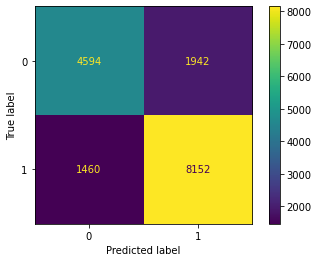

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Dummy Classifier

In [49]:
pipe_dummy = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', DummyClassifier())
])

In [50]:
pipe_dummy.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type'])])),
                ('model', DummyClassifier())])

In [51]:
y_pred_train_dummy = pipe_dummy.predict(X_train)

In [52]:
y_pred_test_dummy = pipe_dummy.predict(X_test)

In [53]:
sklearn.metrics.accuracy_score(y_test, y_pred_test_dummy)

0.5952439930641565

In [54]:
sklearn.metrics.f1_score(y_test, y_pred_test_dummy,average="binary", pos_label='Canceled') 

0.0

In [55]:
cm_dummy = confusion_matrix(y_test, y_pred_test_dummy)
cm_dummy

array([[   0, 6536],
       [   0, 9612]])

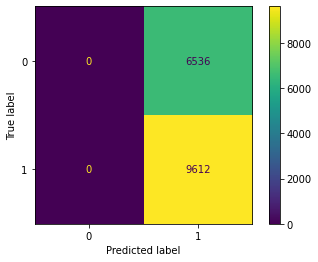

In [56]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dummy)
disp.plot()
plt.show()

Random Forest Classifier

In [57]:
pipe_forest = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0))
])

In [58]:
pipe_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellations',
                                                   'no_of_previous_bookings_not_canceled',
                                                   'avg_price_per_room',
                                                   'no_of_special_requests']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder())]),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [59]:
y_pred_train_forest = pipe_forest.predict(X_train)

In [60]:
y_pred_test_forest = pipe_forest.predict(X_test)

In [61]:
sklearn.metrics.accuracy_score(y_test, y_pred_test_forest)

0.8204111964329948

In [62]:
sklearn.metrics.f1_score(y_test, y_pred_test_forest,average="binary", pos_label='Canceled')

0.765751211631664

In [63]:
cm_forest = confusion_matrix(y_test, y_pred_test_forest)

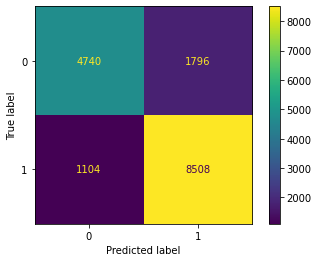

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_forest)
disp.plot()
plt.show()

#Prediction 

In [71]:
reservation = pd.DataFrame({'no_of_adults': [2], 
                            'no_of_children':[0], 
                            'no_of_weekend_nights':[0], 
                            'no_of_week_nights':[2], 
                            'required_car_parking_space':[1], 
                            'lead_time':[160], 
                            'repeated_guest':[1], 
                            'no_of_previous_cancellations':[0], 
                            'no_of_previous_bookings_not_canceled':[5], 
                            'avg_price_per_room':[160], 
                            'no_of_special_requests':[1],
                            'type_of_meal_plan':['Meal Plan 1'], 
                            'room_type_reserved':['Room_Type 4'], 
                            'market_segment_type':['Corporate']})


In [73]:
pipe_forest.predict(reservation)

array(['Not_Canceled'], dtype=object)